In [4]:
import pandas as pd
import numpy as np
import plotly.graph_objs as go

from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot

init_notebook_mode(connected=True)

## Objectives
1. Be able to define and use the different components of a graph in Plotly
2. Be able to display a Plotly graph in Dash
3. Be able to make a Dash app interactive using callbacks
4. Be familiar with Heroku, an easy app hosting service with a free level

In [20]:
trace1 = go.Scatter(x=[1,2,3,4], y=[3,6,8,9], name='Blue')
trace2 = go.Scatter(x=[1,2,3,4], y=[2,7,6,3], name='Orange')
data = [trace1, trace2]
layout = go.Layout()

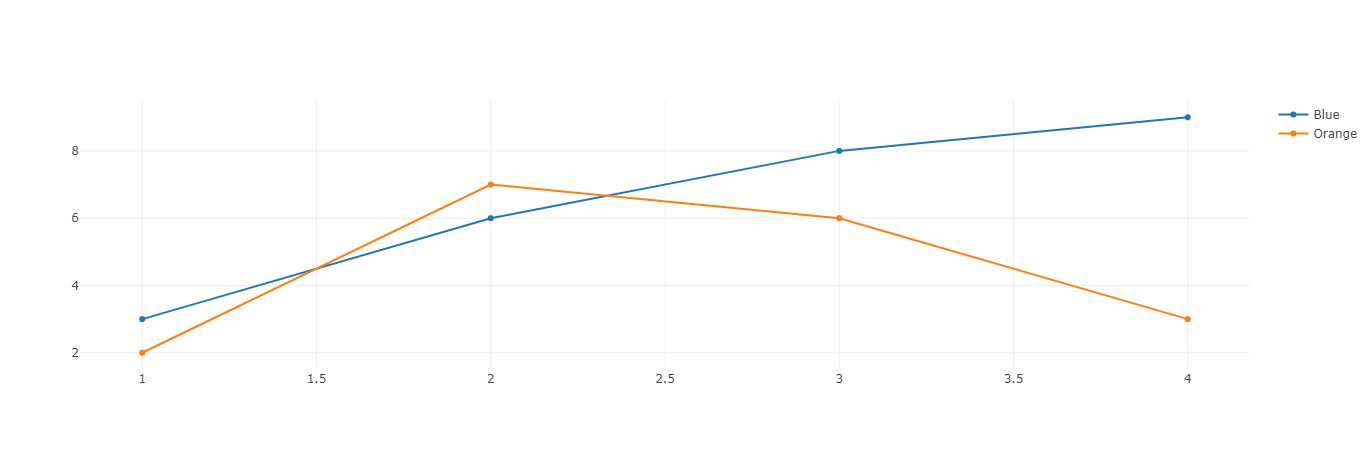

In [21]:
fig = go.Figure(data=data, layout=layout)
iplot(fig)

In [22]:
fig

Figure({
    'data': [{'name': 'Blue',
              'type': 'scatter',
              'uid': 'b64fa16d-29db-47b5-8b89-9a4773322102',
              'x': [1, 2, 3, 4],
              'y': [3, 6, 8, 9]},
             {'name': 'Orange',
              'type': 'scatter',
              'uid': 'a8a63660-ad40-410c-9ff8-6c4b7d914bd1',
              'x': [1, 2, 3, 4],
              'y': [2, 7, 6, 3]}],
    'layout': {}
})

In [23]:
df = pd.read_csv('../data/raw/athlete_events.csv')

In [24]:
df.head()

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
0,1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN
1,2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,NaN
2,3,Gunnar Nielsen Aaby,M,24.0,NaN,NaN,Denmark,DEN,1920 Summer,1920,Summer,Antwerpen,Football,Football Men's Football,NaN
3,4,Edgar Lindenau Aabye,M,34.0,NaN,NaN,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold
4,5,Christine Jacoba Aaftink,F,21.0,185.0,82.0,Netherlands,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,Speed Skating Women's 500 metres,NaN


In [25]:
country_medals = df[["Team", "Year", "Season", "Medal"]].copy()

In [26]:
country_medals.head()

,Team,Year,Season,Medal
0,China,1992,Summer,NaN
1,China,2012,Summer,NaN
2,Denmark,1920,Summer,NaN
3,Denmark/Sweden,1900,Summer,Gold
4,Netherlands,1988,Winter,NaN


In [27]:
summer_country_medals = country_medals[country_medals['Season'] == "Summer"]

In [28]:
summer_medals_counts = summer_country_medals.groupby(['Team', 'Year', 'Medal']).size().unstack(fill_value=0).reset_index()

In [30]:
summer_medals_counts.head()

Medal,Team,Year,Bronze,Gold,Silver
0,A North American Team,1900,4,0,0
1,Afghanistan,2008,1,0,0
2,Afghanistan,2012,1,0,0
3,Algeria,1984,2,0,0
4,Algeria,1992,1,1,0


In [31]:
usa = summer_medals_counts[summer_medals_counts['Team'] == "United States"].copy()
usa_last_five = usa.iloc[-5:].copy()
usa_last_five.Year = usa_last_five.Year.astype('category')

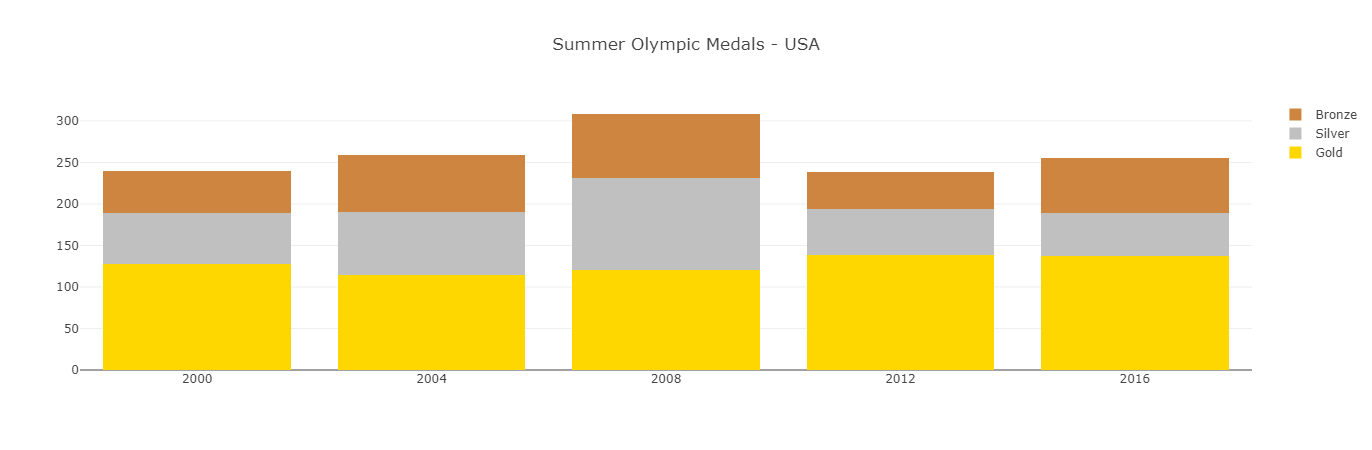

In [37]:
trace1 = go.Bar(x=usa_last_five.Year, y=usa_last_five.Gold, name='Gold', marker=dict(color='rgb(255,215,0)'))
trace2 = go.Bar(x=usa_last_five.Year, y=usa_last_five.Silver, name='Silver', marker=dict(color='rgb(192,192,192)'))
trace3 = go.Bar(x=usa_last_five.Year, y=usa_last_five.Bronze, name='Bronze', marker=dict(color='rgb(205,133,63)'))

data = [trace1, trace2, trace3]

layout = go.Layout(
    barmode='stack',
    title="Summer Olympic Medals - USA",
    xaxis=dict(
        type='category'
    )
)

fig = go.Figure(data=data, layout=layout)

iplot(fig)